# Setting up a DASK cluster on your local machine

This notebook shows how to run a DASK cluster without a scheduler, that's what you would do on your workstation for example.

In [1]:
%matplotlib inline

In [2]:
import xarray as xr

First import the client, this is going to be our interface to see what happens on the DASK cluster:

In [3]:
from dask.distributed import Client

Then we will start a DASK cluster locally:

In [4]:
from dask.distributed import LocalCluster
cluster = LocalCluster()

Connect the client to the cluster:

In [5]:
client = Client(cluster)

In [6]:
client

Client Scheduler: tcp://127.0.0.1:55362 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 17.18 GB


Click on the dashboard link and this will open a new browser tab for the dask dashboard.
That's it we have a cluster up and running. Now let's see what we can do with it:

## Sample computation:

Open a sample dataset with xarray. The path to the data can be either the path to a directory or http address.

In [7]:
ds = xr.tutorial.open_dataset('air_temperature')

In [8]:
ds

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

Compute the time average. This is done lazyly so it is very quick. At this point no computations have been performed.

In [9]:
temp_mean = ds['air'].mean(dim=['time'])

Asking for plot or numerical values will trigger the computation. Time to check out the DASK dashboard ;)

CPU times: user 48.2 ms, sys: 7.5 ms, total: 55.7 ms
Wall time: 53.4 ms


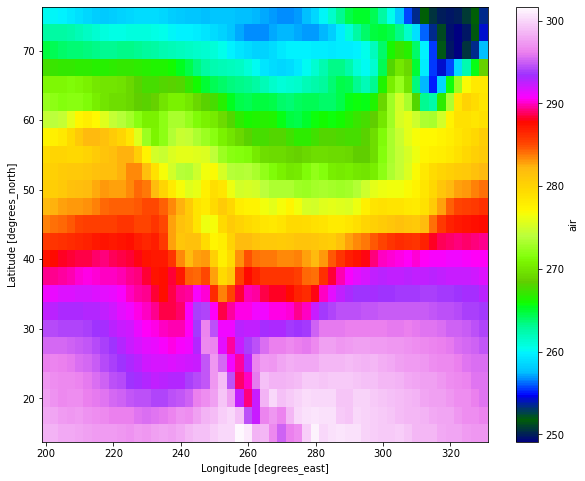

In [10]:
%time temp_mean.plot(figsize=[10,8], cmap='gist_ncar')

once finished, we can shut down the cluster and the client:

In [11]:
cluster.close()
client.close()